In [1]:
import pandas as pd
import numpy as np
# mta_df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_210605.txt')
# mta_df.to_csv('mta_turnstile_210605.csv', header=False, index=False)

In [2]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt" #url with formatting to fill in the number of the particular week
    dfs = []
    for week_num in week_nums: 
        file_url = url.format(week_num) 
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs) #combine files for each week
weeks = [210605, 210612, 210619, 210626, 210703, 210710, 210717, 210724, 210731, 210807, 210814, 210821, 210828]
# turnstiles_df = get_data(weeks)
# turnstiles_df.to_csv('mta_data_all.csv', header = False, index = False) #Imports all data to a csv that can be read by SQL

In [3]:
from sqlalchemy import create_engine
import pandas as pd
engine = create_engine("sqlite:///mta_all.db")
all_data = pd.read_sql('SELECT * FROM mta_data;', engine)

In [4]:
ts_df1 = all_data
ts_df1.sample(20)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
484563,N103,R127,00-03-01,JAY ST-METROTEC,ACF,IND,06/13/2021,00:00:00,REGULAR,117440512,176
729402,N506,R022,00-00-00,34 ST-HERALD SQ,BDFMNQRW,IND,06/20/2021,08:00:00,REGULAR,8345399,14734187
1121967,N193,R337,00-00-02,BEACH 44 ST,A,IND,07/08/2021,20:00:00,REGULAR,1375513,727392
849967,A071,R044,02-00-00,CHAMBERS ST,JZ456,BMT,07/01/2021,04:00:00,REGULAR,179776,102150
2458606,R208,R014,03-03-00,FULTON ST,2345ACJZ,IRT,08/15/2021,13:00:00,REGULAR,3818,59686
1334977,N218,R112,01-05-00,FORDHAM RD,BD,IND,07/12/2021,16:00:00,REGULAR,458777,1
959079,PTH05,R543,00-00-03,EXCHANGE PLACE,1,PTH,07/02/2021,22:44:20,REGULAR,26160,17533
2290354,R534,R055,01-03-03,FLUSHING-MAIN,7,IRT,08/11/2021,12:00:00,REGULAR,23408687,6447828
1458975,R622,R123,00-00-03,FRANKLIN AV,2345S,IRT,07/13/2021,08:00:00,REGULAR,6153488,2432131
598230,R332,R365,00-00-02,219 ST,25,IRT,06/13/2021,09:00:00,REGULAR,6634098,5088510


In [5]:
import datetime as dt
ts_df1['Date_time'] = pd.to_datetime(ts_df1.DATE.astype(str) + ' ' + ts_df1.TIME.astype(str))
# ts_df1.head(5)

In [6]:
ts_df1.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'Date_time']).ENTRIES.count().reset_index().sort_values('ENTRIES', ascending=False).head(5)

,CA,UNIT,SCP,STATION,Date_time,ENTRIES
2448636,R514,R094,00-05-00,ASTORIA BLVD,2021-07-22 04:00:00,2
1172385,N335,R158,01-00-03,KEW GARDENS,2021-06-20 18:30:00,2
2457222,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 00:00:00,2
2457223,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 04:00:00,2
2457224,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 08:00:00,2


In [7]:
ts_df1.sort_values(['CA', 'UNIT', 'SCP', 'STATION', 'Date_time'], inplace=True, ascending=False)
ts_df1.drop_duplicates(subset=['CA', 'UNIT', 'SCP', 'STATION', 'Date_time'], inplace=True)


In [8]:
ts_df1.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'Date_time']).EXITS.count().reset_index().sort_values('EXITS', ascending=False).head(5)

,CA,UNIT,SCP,STATION,Date_time,EXITS
0,A002,R051,02-00-00,59 ST,2021-05-29 00:00:00,1
1815048,R138,R293,00-03-02,34 ST-PENN STA,2021-07-22 18:00:00,1
1815050,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 02:00:00,1
1815051,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 06:00:00,1
1815052,R138,R293,00-03-02,34 ST-PENN STA,2021-07-23 10:00:00,1


In [9]:
ts_df1.LINENAME.unique()
# {['14 ST-UNION SQ LNQR456W', '14 ST-UNION SQ 456LNQRW'],
#  ['ATL AV-BARCLAY BDNQR2345', 'ATL AV-BARCLAY 2345BDNQR'],
#  ['FULTON ST ACJZ2345', 'FULTON ST 2345ACJZ'],
#  ['161/YANKEE STAD BD4', '161/YANKEE STAD 4BD'],
#  ['59 ST NQR456W', '59 ST 456NQRW'],
#  ['14 ST FLM123', '14 ST 123FLM'],
#  ['59 ST COLUMBUS 1ABCD', '59 ST COLUMBUS ABCD1'],
#  ['TIMES SQ-42 ST ACENQRS1237W', 'TIMES SQ-42 ST 1237ACENQRSW'],
#  ['168 ST 1AC', '168 ST AC1']}

array(['R', '1', '5', '25', '3', '34', '2345S', '23', 'BDNQR2345',
       '2345BDNQR', '2345', '2345R', '7', '7EFMR', 'NQW', '7NQW', '7BDFM',
       '6', '2', '4', '4BD', '245', '45', '456', '456NQRW', '4567S',
       '456LNQRW', '6DF', '456JZ', '2345ACJZ', '1AC', '123', '1ABCD',
       '1237ACENQRSW', '1237ACENQRS', '123ACE', '123FLM', '23ACE', '1RW',
       'Q', 'EJZ', 'E', 'F', 'FG', 'DFGMNR', 'FJMZ', 'BD', 'BDFQ6',
       'FLM123', 'FM', 'BDFMNQRW', 'BDFM7', 'BDFM', 'G', 'GL', 'EMG',
       'EF', 'EFMR', 'MR', 'EFMR7', 'EMR', 'EM6', 'EM', 'BDE', 'D', 'BD4',
       'A', 'AS', 'AC', 'C', 'ACJLZ', 'ACS', 'ACG', 'ACF', 'ACJZ2345',
       'ACE23', 'ACE', 'CE', 'ABCDEFM', 'ACEL', 'ACENQRS1237W',
       'ACENGRS1237W', 'ABCD1', 'BC', 'ACBD', 'ABCD', 'AC1', 'M', 'JZ',
       'J', 'JMZ', 'JM', 'L', 'LM', 'LG', 'FQ', 'DFNQ', 'N', 'ND', 'NRW',
       'DNR', 'BDNQR', 'R2345', 'BQ', 'BQS', 'S2345', 'S', 'JZ456',
       'JNQRZ6W', 'R1W', 'RNW', 'LNQR456W', 'NQRW', 'NQR456W'],
      dtype=object)

In [10]:
ts_entries_daily = (ts_df1.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DATE'], as_index=False).ENTRIES.max())

In [11]:
ts_entries_daily.head()

,CA,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,05/29/2021,7579021
1,A002,R051,02-00-00,59 ST,NQR456W,05/30/2021,7579275
2,A002,R051,02-00-00,59 ST,NQR456W,05/31/2021,7579593
3,A002,R051,02-00-00,59 ST,NQR456W,06/01/2021,7580178
4,A002,R051,02-00-00,59 ST,NQR456W,06/02/2021,7580754


In [12]:
ts_entries_daily[['PREV_DATE', 'PREV_ENTRIES']] = (ts_entries_daily.groupby(["CA", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]].shift(1))

In [13]:
ts_entries_daily.dropna(subset=['PREV_DATE'], axis=0, inplace=True)

In [14]:
ts_entries_daily

,CA,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,NQR456W,05/30/2021,7579275,05/29/2021,7579021.0
2,A002,R051,02-00-00,59 ST,NQR456W,05/31/2021,7579593,05/30/2021,7579275.0
3,A002,R051,02-00-00,59 ST,NQR456W,06/01/2021,7580178,05/31/2021,7579593.0
4,A002,R051,02-00-00,59 ST,NQR456W,06/02/2021,7580754,06/01/2021,7580178.0
5,A002,R051,02-00-00,59 ST,NQR456W,06/03/2021,7581328,06/02/2021,7580754.0
...,...,...,...,...,...,...,...,...,...
454566,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/23/2021,5554,08/22/2021,5554.0
454567,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/24/2021,5554,08/23/2021,5554.0
454568,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/25/2021,5554,08/24/2021,5554.0
454569,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,08/26/2021,5554,08/25/2021,5554.0


In [15]:
(ts_entries_daily["ENTRIES"] - ts_entries_daily["PREV_ENTRIES"]).describe()

count    4.495520e+05
mean    -6.139827e+03
std      2.926490e+06
min     -1.383110e+09
25%      8.200000e+01
50%      2.640000e+02
75%      5.220000e+02
max      6.684993e+08
dtype: float64

In [16]:
ts_entries_daily[ts_entries_daily['ENTRIES'] < ts_entries_daily['PREV_ENTRIES']].head(5)

,CA,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
3550,A011,R080,01-03-00,57 ST-7 AV,NQRW,05/30/2021,885601566,05/29/2021,885601748.0
3551,A011,R080,01-03-00,57 ST-7 AV,NQRW,05/31/2021,885601403,05/30/2021,885601566.0
3552,A011,R080,01-03-00,57 ST-7 AV,NQRW,06/01/2021,885601292,05/31/2021,885601403.0
3553,A011,R080,01-03-00,57 ST-7 AV,NQRW,06/02/2021,885601049,06/01/2021,885601292.0
3554,A011,R080,01-03-00,57 ST-7 AV,NQRW,06/03/2021,885600810,06/02/2021,885601049.0


In [17]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
#         print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

ts_entries_daily["DAILY_ENTRIES"] = ts_entries_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [18]:
ts_entries_daily.sample(20)

,CA,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
41884,B031,R172,01-00-02,BRIGHTON BEACH,BQ,07/03/2021,3438719,07/02/2021,3.438616e+06,103.0
79004,H027,R137,01-06-00,MYRTLE-WYCKOFF,LM,07/01/2021,1664741779,06/30/2021,1.664741e+09,773.0
433915,R610,R057,00-05-00,ATL AV-BARCLAY,2345BDNQR,08/05/2021,463138,08/04/2021,4.631340e+05,4.0
77835,H023,R236,00-06-00,DEKALB AV,L,07/15/2021,1926606013,07/14/2021,1.926607e+09,718.0
287927,R107D,R305,04-00-03,WTC-CORTLANDT,1,06/15/2021,526967,06/14/2021,5.267300e+05,237.0
198742,N339A,R114,00-03-01,PARSONS BLVD,F,07/08/2021,5226411,07/07/2021,5.226064e+06,347.0
218499,N506,R022,00-00-02,34 ST-HERALD SQ,BDFMNQRW,07/22/2021,5517262,07/21/2021,5.516088e+06,1174.0
182996,N317,R267,02-06-01,46 ST,MR,06/22/2021,339205,06/21/2021,3.391950e+05,10.0
234633,N543,R289,00-00-02,FT HAMILTON PKY,FG,06/05/2021,699144,06/04/2021,6.990800e+05,64.0
390889,R336,R145,00-03-01,WAKEFIELD/241,2,06/08/2021,4221918,06/07/2021,4.221245e+06,673.0


In [19]:
ts_exits_daily = ts_df1.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'DATE', 'LINENAME'], as_index=False).EXITS.max()

In [20]:
ts_exits_daily

,CA,UNIT,SCP,STATION,DATE,LINENAME,EXITS
0,A002,R051,02-00-00,59 ST,05/29/2021,NQR456W,2590439
1,A002,R051,02-00-00,59 ST,05/30/2021,NQR456W,2590548
2,A002,R051,02-00-00,59 ST,05/31/2021,NQR456W,2590641
3,A002,R051,02-00-00,59 ST,06/01/2021,NQR456W,2590917
4,A002,R051,02-00-00,59 ST,06/02/2021,NQR456W,2591200
...,...,...,...,...,...,...,...
454566,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/23/2021,R,614
454567,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/24/2021,R,614
454568,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/25/2021,R,614
454569,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/26/2021,R,614


In [21]:
ts_exits_daily[['PREV_DATE', 'PREV_EXIT']] = (ts_exits_daily.groupby(['CA', 'UNIT', 'SCP', 'STATION'])[['DATE', 'EXITS']].shift(1))

In [22]:
ts_exits_daily.dropna(subset=['PREV_DATE'], axis=0, inplace=True)

In [23]:
ts_exits_daily

,CA,UNIT,SCP,STATION,DATE,LINENAME,EXITS,PREV_DATE,PREV_EXIT
1,A002,R051,02-00-00,59 ST,05/30/2021,NQR456W,2590548,05/29/2021,2590439.0
2,A002,R051,02-00-00,59 ST,05/31/2021,NQR456W,2590641,05/30/2021,2590548.0
3,A002,R051,02-00-00,59 ST,06/01/2021,NQR456W,2590917,05/31/2021,2590641.0
4,A002,R051,02-00-00,59 ST,06/02/2021,NQR456W,2591200,06/01/2021,2590917.0
5,A002,R051,02-00-00,59 ST,06/03/2021,NQR456W,2591445,06/02/2021,2591200.0
...,...,...,...,...,...,...,...,...,...
454566,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/23/2021,R,614,08/22/2021,613.0
454567,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/24/2021,R,614,08/23/2021,614.0
454568,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/25/2021,R,614,08/24/2021,614.0
454569,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/26/2021,R,614,08/25/2021,614.0


In [24]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXIT"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
#         print(f'exits: {row["EXITS"]} <-- {row["PREV_EXIT"]}')
        
        counter = min(row["EXITS"], row["PREV_EXIT"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

ts_exits_daily["DAILY_EXITS"] = ts_exits_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [25]:
ts_exits_daily.DAILY_EXITS.describe()
ts_exits_daily.head(20)

,CA,UNIT,SCP,STATION,DATE,LINENAME,EXITS,PREV_DATE,PREV_EXIT,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,05/30/2021,NQR456W,2590548,05/29/2021,2590439.0,109.0
2,A002,R051,02-00-00,59 ST,05/31/2021,NQR456W,2590641,05/30/2021,2590548.0,93.0
3,A002,R051,02-00-00,59 ST,06/01/2021,NQR456W,2590917,05/31/2021,2590641.0,276.0
4,A002,R051,02-00-00,59 ST,06/02/2021,NQR456W,2591200,06/01/2021,2590917.0,283.0
5,A002,R051,02-00-00,59 ST,06/03/2021,NQR456W,2591445,06/02/2021,2591200.0,245.0
6,A002,R051,02-00-00,59 ST,06/04/2021,NQR456W,2591617,06/03/2021,2591445.0,172.0
7,A002,R051,02-00-00,59 ST,06/05/2021,NQR456W,2591700,06/04/2021,2591617.0,83.0
8,A002,R051,02-00-00,59 ST,06/06/2021,NQR456W,2591798,06/05/2021,2591700.0,98.0
9,A002,R051,02-00-00,59 ST,06/07/2021,NQR456W,2592072,06/06/2021,2591798.0,274.0
10,A002,R051,02-00-00,59 ST,06/08/2021,NQR456W,2592300,06/07/2021,2592072.0,228.0


In [26]:
ca_unit_station_entries = ts_entries_daily.groupby(['CA', 'UNIT', 'STATION', 'DATE', 'LINENAME'])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_entries.head()

,CA,UNIT,STATION,DATE,LINENAME,DAILY_ENTRIES
0,A002,R051,59 ST,05/30/2021,NQR456W,2106.0
1,A002,R051,59 ST,05/31/2021,NQR456W,2484.0
2,A002,R051,59 ST,06/01/2021,NQR456W,4790.0
3,A002,R051,59 ST,06/02/2021,NQR456W,5011.0
4,A002,R051,59 ST,06/03/2021,NQR456W,4749.0


In [27]:
ca_unit_station_exits = ts_exits_daily.groupby(['CA', 'UNIT', 'STATION', 'DATE', 'LINENAME'])[['DAILY_EXITS']].sum().reset_index()
ca_unit_station_exits.head()

,CA,UNIT,STATION,DATE,LINENAME,DAILY_EXITS
0,A002,R051,59 ST,05/30/2021,NQR456W,1452.0
1,A002,R051,59 ST,05/31/2021,NQR456W,1846.0
2,A002,R051,59 ST,06/01/2021,NQR456W,3683.0
3,A002,R051,59 ST,06/02/2021,NQR456W,4080.0
4,A002,R051,59 ST,06/03/2021,NQR456W,3795.0


In [28]:
station_daily_entries = ts_entries_daily.groupby(['STATION', 'DATE', 'LINENAME'])[['DAILY_ENTRIES']].sum().reset_index()
station_daily_entries.head()

,STATION,DATE,LINENAME,DAILY_ENTRIES
0,1 AV,05/30/2021,L,4575.0
1,1 AV,05/31/2021,L,4943.0
2,1 AV,06/01/2021,L,7487.0
3,1 AV,06/02/2021,L,7993.0
4,1 AV,06/03/2021,L,7844.0


In [29]:
station_daily_exits = ts_exits_daily.groupby(['STATION', 'DATE', 'LINENAME'])[['DAILY_EXITS']].sum().reset_index()
station_daily_exits.head()

,STATION,DATE,LINENAME,DAILY_EXITS
0,1 AV,05/30/2021,L,8830.0
1,1 AV,05/31/2021,L,8936.0
2,1 AV,06/01/2021,L,12730.0
3,1 AV,06/02/2021,L,13067.0
4,1 AV,06/03/2021,L,13031.0


In [30]:
station_total_exits = station_daily_exits.groupby(['STATION', 'LINENAME'])['DAILY_EXITS'].sum().reset_index().sort_values('DAILY_EXITS', ascending=False)
station_total_exits.head(10)

,STATION,LINENAME,DAILY_EXITS
89,34 ST-HERALD SQ,BDFMNQRW,4577562.0
312,GRD CNTRL-42 ST,4567S,4106991.0
404,PATH NEW WTC,1,3806358.0
102,42 ST-PORT AUTH,ACENQRS1237W,3583185.0
93,34 ST-PENN STA,ACE,3279849.0
387,NEWARK HM HE,1,2938042.0
302,FULTON ST,2345ACJZ,2524458.0
289,FLUSHING-MAIN,7,2412090.0
28,14 ST-UNION SQ,LNQR456W,2196294.0
138,72 ST,123,2165494.0


In [31]:
station_total_entries = station_daily_entries.groupby(['STATION', 'LINENAME'])['DAILY_ENTRIES'].sum().reset_index().sort_values('DAILY_ENTRIES', ascending=False)
station_total_entries.head(10)

,STATION,LINENAME,DAILY_ENTRIES
89,34 ST-HERALD SQ,BDFMNQRW,3677527.0
404,PATH NEW WTC,1,3397612.0
312,GRD CNTRL-42 ST,4567S,2864685.0
102,42 ST-PORT AUTH,ACENQRS1237W,2410646.0
289,FLUSHING-MAIN,7,2084488.0
93,34 ST-PENN STA,ACE,2057637.0
339,JKSN HT-ROOSVLT,EFMR7,1968776.0
446,THIRTY THIRD ST,1,1912203.0
87,33 ST,6,1860717.0
302,FULTON ST,2345ACJZ,1823701.0


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

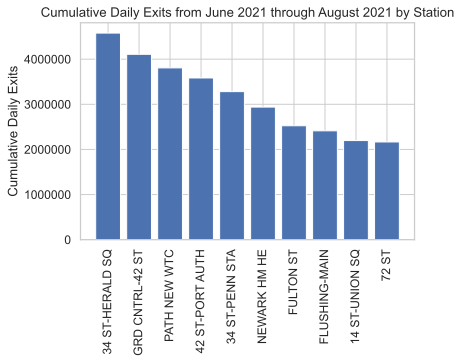

In [33]:
plt.bar(x=station_total_exits['STATION'][:10], height=station_total_exits['DAILY_EXITS'][:10])
plt.xticks(rotation=90)
plt.ylabel('Cumulative Daily Exits')
plt.title('Cumulative Daily Exits from June 2021 through August 2021 by Station')
plt.ticklabel_format(axis='y', style='plain')

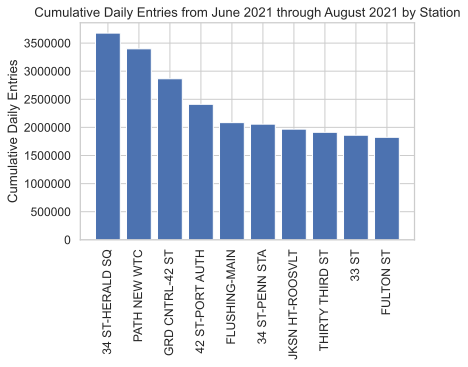

In [34]:
plt.bar(x=station_total_entries['STATION'][:10], height=station_total_entries['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90)
plt.ylabel('Cumulative Daily Entries')
plt.title('Cumulative Daily Entries from June 2021 through August 2021 by Station')
plt.ticklabel_format(axis='y', style='plain')

In [35]:
# todo: Create a chart looking at the highest traffic stations with the lines, as well as days and daily peak
station_daily_exits['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_exits['DATE']).dt.dayofweek
station_daily_exits_avg = station_daily_exits.groupby(['STATION', 'DAY_OF_WEEK_NUM'])['DAILY_EXITS'].mean().reset_index()
station_daily_exits_avg

,STATION,DAY_OF_WEEK_NUM,DAILY_EXITS
0,1 AV,0,12385.461538
1,1 AV,1,13306.076923
2,1 AV,2,13707.615385
3,1 AV,3,14079.846154
4,1 AV,4,14614.384615
...,...,...,...
2648,ZEREGA AV,2,1402.538462
2649,ZEREGA AV,3,1398.153846
2650,ZEREGA AV,4,1349.692308
2651,ZEREGA AV,5,806.916667


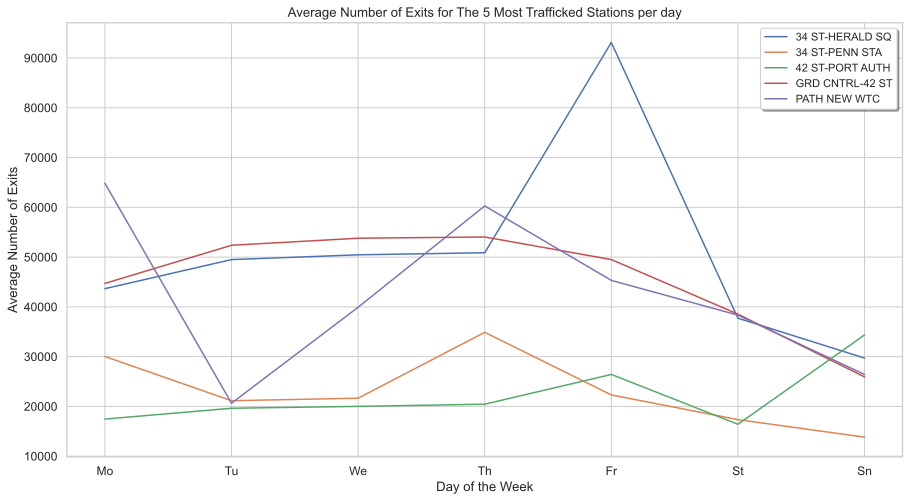

In [58]:
station_mask =((station_daily_exits_avg['STATION'] == '34 ST-HERALD SQ')|
               (station_daily_exits_avg['STATION'] == 'GRD CNTRL-42 ST')|
               (station_daily_exits_avg['STATION'] == 'PATH NEW WTC')|
               (station_daily_exits_avg['STATION'] == '42 ST-PORT AUTH')|
               (station_daily_exits_avg['STATION'] == '34 ST-PENN STA'))
station_day_exit_avg_top = station_daily_exits_avg[station_mask].reset_index()
plt.figure(figsize=(15,8)) 
for i, group in station_day_exit_avg_top.groupby('STATION'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_EXITS'], label = i)
plt.legend(shadow = True, loc = 0, fontsize = 'small')
plt.xlabel('Day of the Week');
plt.ylabel('Average Number of Exits');
plt.title('Average Number of Exits for The 5 Most Trafficked Stations per day')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn']);

plt.savefig('figures/avg_exits_day_top5.svg', bbox_inches = 'tight')

In [56]:
st_34_herald_exits_day = station_daily_exits[station_daily_exits['STATION']=='34 ST-HERALD SQ'].copy()
st_34_herald_exits_day['DAY_OF_WEEK_NUM'] = pd.to_datetime(st_34_herald_exits_day['DATE']).dt.dayofweek
st_34_herald_exits_day_avg_chrt = st_34_herald_exits_day.groupby('DAY_OF_WEEK_NUM')['DAILY_EXITS'].mean().reset_index()
st_34_herald_exits_day_avg.DAILY_EXITS.describe()

count        7.000000
mean     50717.376374
std      20244.161403
min      29705.846154
25%      40688.201923
50%      49500.384615
75%      50664.692308
max      93109.615385
Name: DAILY_EXITS, dtype: float64

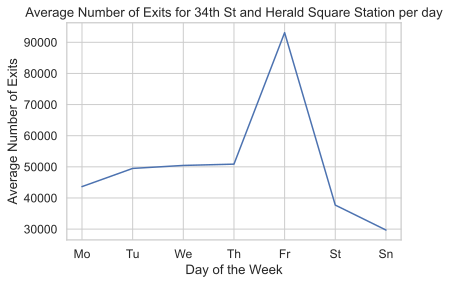

In [51]:
plt.plot(st_34_herald_exits_day_avg['DAY_OF_WEEK_NUM'], st_34_herald_exits_day_avg['DAILY_EXITS'])

plt.xlabel('Day of the Week');
plt.ylabel('Average Number of Exits');
plt.title('Average Number of Exits for 34th St and Herald Square Station per day')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn']);